In [ ]:
#@title
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissor.zip

--2020-06-12 02:48:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissor.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  5.82MB/s    in 64s     

2020-06-12 02:50:01 (4.84 MB/s) - ‘/tmp/rock_paper_scissor.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rock_paper_scissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'w')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2, horizontal_flip=True)
t = datagen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size = 32,
    subset='training',
    class_mode='categorical'
    )

v = datagen.flow_from_directory(
    '/tmp/rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size = 32,
    subset='validation',
    class_mode='categorical' )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      t,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data = v, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 16s - loss: 0.0197 - accuracy: 0.9962 - val_loss: 0.1196 - val_accuracy: 0.9609
Epoch 2/20
25/25 - 16s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.0804 - val_accuracy: 0.9609
Epoch 3/20
25/25 - 16s - loss: 0.0313 - accuracy: 0.9912 - val_loss: 0.1412 - val_accuracy: 0.9453
Epoch 4/20
25/25 - 16s - loss: 0.0319 - accuracy: 0.9924 - val_loss: 0.1623 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 16s - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.1382 - val_accuracy: 0.9531
Epoch 6/20
25/25 - 16s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9766
Epoch 7/20
25/25 - 16s - loss: 0.0126 - accuracy: 0.9975 - val_loss: 0.0765 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 16s - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.1398 - val_accuracy: 0.9453
Epoch 9/20
25/25 - 16s - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.1876 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 16s - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.1855 - val_accuracy: 0.9453
Epoch 11/

Saving WhatsApp Image 2020-06-12 at 4.00.28 PM (1).jpeg to WhatsApp Image 2020-06-12 at 4.00.28 PM (1).jpeg
PATH =  WhatsApp Image 2020-06-12 at 4.00.28 PM (1).jpeg
CLASSES =  [[2.9010995e-04 9.1787535e-01 8.1834592e-02]]
WhatsApp Image 2020-06-12 at 4.00.28 PM (1).jpeg
rock


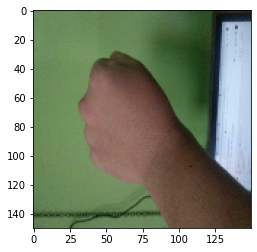

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print("PATH = " , path)
  print("CLASSES = ", classes)
  
  
  print(fn)
  if hasil==0:
    print('paper')
  elif hasil==1:
    print('rock')
  else:
    print('scissor')
  